# **Import libraries**

In [98]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras.utils as image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
import keras.layers as layers
from keras.models import Model
import cv2

## Load Data ##

In [99]:
data_path = '/kaggle/input/product-image/dataset'

## Data Preprocessing ##

In [100]:
data = tf.keras.utils.image_dataset_from_directory(data_path) # Generate Data
data = data.map(lambda x,y: (x/255, y))  # data normalization

Found 140 files belonging to 4 classes.


In [101]:
# split data to train , validation and test
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [102]:
print(test_size)

1


## Data Visualization ##

Found 140 files belonging to 4 classes.


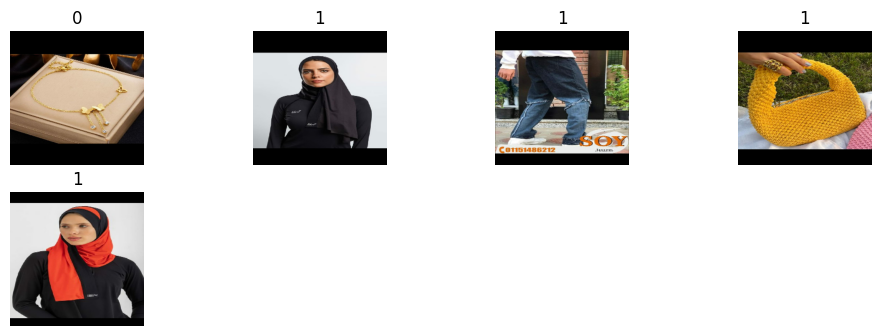

In [103]:
def product_image(dataset):
  plt.figure(figsize=(12, 8))
  index = 0
  for image, label in dataset.take(15):
    index +=1
    ax = plt.subplot(4, 4, index)
    plt.imshow(image[index].numpy().astype("uint8"))
    plt.title(int(label[index]))
    plt.axis("off")

dataset =  tf.keras.utils.image_dataset_from_directory(data_path)

product_image(dataset)

# **Model Structure**

In [104]:
# Load the pre-trained VGG16 model
vgg_model = VGG16(
weights='imagenet',
include_top=False,
input_shape=(256,256,3)
)

# Create a new model by adding a few layers on top of the pre-trained model
model = Sequential()
model.add(vgg_model)

model.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

# Freeze the weights of the pre-trained model
model.layers[0].trainable = False

In [105]:
# Compile the model with appropriate loss function, optimizer, and metrics
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_vgg = model.fit(train, epochs=16, validation_data=val, callbacks=[early_stopping])

Epoch 1/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 812ms/step - accuracy: 0.2383 - loss: 1.3908 - val_accuracy: 0.2188 - val_loss: 1.3546
Epoch 2/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 376ms/step - accuracy: 0.3021 - loss: 1.3513 - val_accuracy: 0.3750 - val_loss: 1.3378
Epoch 3/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.3490 - loss: 1.2933 - val_accuracy: 0.5625 - val_loss: 1.2119
Epoch 4/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.5638 - loss: 1.1849 - val_accuracy: 0.5625 - val_loss: 1.0957
Epoch 5/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - accuracy: 0.6419 - loss: 1.1165 - val_accuracy: 0.6875 - val_loss: 0.9103
Epoch 6/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step - accuracy: 0.6823 - loss: 0.9414 - val_accuracy: 0.8750 - val_loss: 0.7615
Epoch 7/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 454ms/step - accuracy: 0.8685 - loss: 0.7773 - val_accuracy: 0.8125 - val_loss: 0.5848
Epoch 8/16
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - accuracy: 0.8490 - loss: 0.5845 - val_accuracy: 0.9062 - val_loss:

## Data Visualization ##

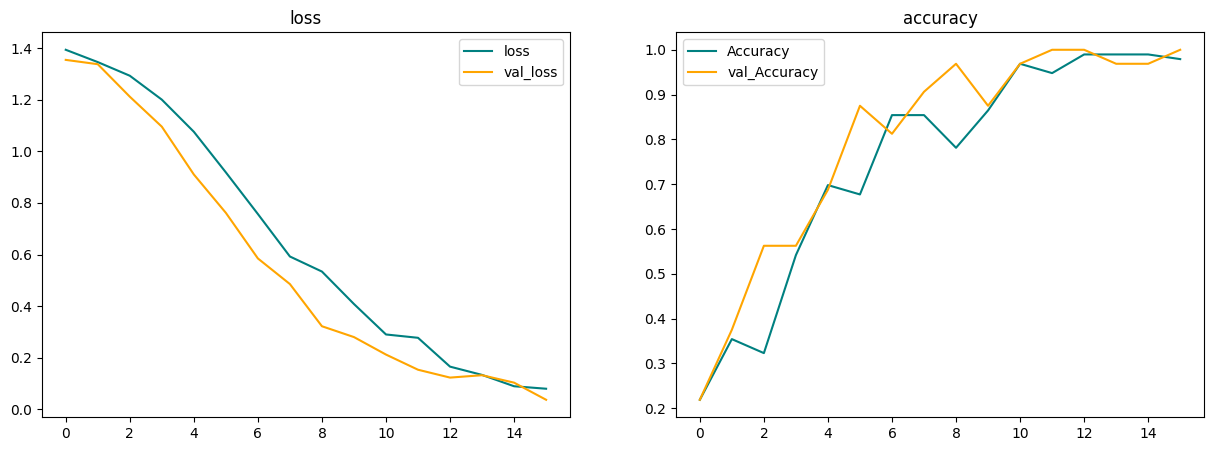

In [106]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_vgg.history['loss'], color='teal', label='loss')
plt.plot(history_vgg.history['val_loss'], color='orange', label='val_loss')
plt.title('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_vgg.history['accuracy'], color='teal', label='Accuracy')
plt.plot(history_vgg.history['val_accuracy'], color='orange', label='val_Accuracy')
plt.title('accuracy')
plt.legend()
plt.show()

## Evaluation ##

In [107]:
print(len(test))

1


In [108]:
print('-' * 60)

train_score = model.evaluate(train, verbose= 1)
val_score = model.evaluate(val, verbose= 1)
test_score = model.evaluate(test, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 40)
print("validation Loss: ", val_score[0])
print("validation Accuracy: ", val_score[1])
print('-' * 40)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

------------------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.9948 - loss: 0.0443
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 1.0000 - loss: 0.0404
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 2.1448
Train Loss:  0.05097195878624916
Train Accuracy:  0.9895833134651184
----------------------------------------
validation Loss:  0.04043308272957802
validation Accuracy:  1.0
----------------------------------------
Test Loss:  2.1447715759277344
Test Accuracy:  0.6666666865348816


# **Testing**

In [109]:
# Load the image you want to test
image_path = '/kaggle/input/product-image/FImage_2.jpeg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))

# Preprocess the image
img = img / 255.0  # Normalize pixel values
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Predict the class probabilities using the trained model
class_probabilities = model.predict(img)

# Define class names
class_names = ['accessories', 'fashion', 'games', 'home']

# Get the predicted class
predicted_class_index = np.argmax(class_probabilities)
predicted_class = class_names[predicted_class_index]

print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
Predicted Class: fashion
